In [397]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [430]:
earnings_data = pd.read_csv('data/B24021_median_earnings_occupation_5YALL_-688641291965021816.csv')
inspection_df = pd.read_csv('data/Code_Complaints_and_Violations_20240704.csv')
crime_df = pd.read_csv('data/SPD_Crime_Data__2008-Present_20240704.csv')
housing_data = pd.read_csv('data/DP04_5YALL_3840298254942809598.csv')
zillow_housing = pd.read_csv('data/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
census = pd.read_csv('data/2020_Census_Tracts_Seattle_-7486928068189135549.csv')
language_per_neighborhood = pd.read_csv('data/language_per_neighborhood.csv')
demogra_census = pd.read_csv('data/CensusBGGEO_2020_-8839192176228303427.csv')
unemployment_rate = pd.read_csv('data/SEAT653URN.csv')

In [399]:
crime_df.columns = crime_df.columns.str.lower().str.strip().str.replace(' ','_')
crime_df['offense_start_datetime'] = pd.to_datetime(crime_df['offense_start_datetime'])
crime_df['report_datetime'] = pd.to_datetime(crime_df['report_datetime'])
crime_df.dropna(subset=['mcpp', 'offense_start_datetime'], inplace=True)
crime_df.drop_duplicates(inplace=True)  

In [400]:
crime_df.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [183]:
crime_df['offense'] = crime_df['offense'].str.lower()
crime_df['offense']

0                             drug/narcotic violations
1          theft of motor vehicle parts or accessories
2                                              robbery
3             destruction/damage/vandalism of property
4                          driving under the influence
                              ...                     
1128967                            motor vehicle theft
1128968                            motor vehicle theft
1128969                                    shoplifting
1128970                                    shoplifting
1128971                            motor vehicle theft
Name: offense, Length: 1127135, dtype: object

In [184]:
crime_df['mcpp'].unique()

array(['MAGNOLIA', 'ROOSEVELT/RAVENNA', 'BALLARD SOUTH',
       'DOWNTOWN COMMERCIAL', 'PHINNEY RIDGE',
       'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'NORTHGATE', 'CAPITOL HILL',
       'UNIVERSITY', 'COLUMBIA CITY', 'NORTH BEACON HILL', 'FIRST HILL',
       'GEORGETOWN', 'QUEEN ANNE', 'SODO', 'CENTRAL AREA/SQUIRE PARK',
       'MID BEACON HILL', 'ALASKA JUNCTION', 'FREMONT', 'NORTH ADMIRAL',
       'SLU/CASCADE', 'CHINATOWN/INTERNATIONAL DISTRICT', 'SANDPOINT',
       'HILLMAN CITY', 'HIGH POINT', 'MOUNT BAKER', 'HIGHLAND PARK',
       'BITTERLAKE', 'BELLTOWN', 'PIONEER SQUARE',
       'JUDKINS PARK/NORTH BEACON HILL', 'MADRONA/LESCHI', 'MADISON PARK',
       'NORTH DELRIDGE', 'CLAREMONT/RAINIER VISTA', 'RAINIER VIEW',
       'MONTLAKE/PORTAGE BAY', 'LAKEWOOD/SEWARD PARK', 'SOUTH DELRIDGE',
       'WALLINGFORD', 'SOUTH BEACON HILL', 'NEW HOLLY', 'GREENWOOD',
       'BALLARD NORTH', 'PIGEON POINT', 'MORGAN', 'BRIGHTON/DUNLAP',
       'MILLER PARK', 'EASTLAKE - WEST', 'RAINIER BEACH', 'SOUTH

In [185]:
#how often is the type of offense happening per neigborhood per year
def crime_type(year, mcpp):
    for i in crime_df:
        crime_types = crime_df[(crime_df['year'] == year) & (crime_df['mcpp'] == mcpp)]
        #crime_types['offense'] == 1


    #yearly_crime_rate = yearly_crime_rate.groupby(['mcpp','offense']).size().reset_index(name='crime_count')
    return crime_types



In [186]:
# crime_type('2018','MAGNOLIA')

In [187]:
crime_df['offense_start_datetime'] = pd.to_datetime(crime_df['offense_start_datetime'])
# Step 3: Filter the data for the year 2014
crime_2014 = crime_df[crime_df['offense_start_datetime'].dt.year == 2014]
# Step 4: Group by the ‘MCPP’ and ‘Offense Parent Group’ columns and count the number of offenses per neighborhood and offense type
offense_counts_2014 = crime_2014.groupby(['mcpp', 'offense']).size().reset_index(name='offense_count')


In [188]:
offense_counts_2014

,mcpp,offense,offense_count
0,ALASKA JUNCTION,aggravated assault,20
1,ALASKA JUNCTION,all other larceny,65
2,ALASKA JUNCTION,assisting or promoting prostitution,2
3,ALASKA JUNCTION,bad checks,5
4,ALASKA JUNCTION,burglary/breaking & entering,72
...,...,...,...
1809,WALLINGFORD,theft from coin-operated machine or device,1
1810,WALLINGFORD,theft from motor vehicle,230
1811,WALLINGFORD,theft of motor vehicle parts or accessories,48
1812,WALLINGFORD,trespass of real property,18


In [189]:
# H0 (Null Hypothesis): There is no significant correlation between concentrations of certain crime types and crime rates.
# H1 (Alternative Hypothesis): Areas with higher concentrations of certain crime types (e.g., property crimes) will show higher crime rates.
#CHOOSE OFFENSE type and see in which mcpp it is the highest and compare to the whole rate per mcpp

#simple assault groupby mcppp and then total crime per mcpp

# crime_rate_mcpp = crime_df.groupby(['year', 'offense', 'mcpp']).count()
# crime_assault_mcpp = crime_df[crime_df['offense'] == 'simple assault']

# scipy.stats.ttest_ind(two_data.loc['cat'], two_data.loc['cat2'], equal_var=False)

In [190]:
property_crimes = crime_df[crime_df['crime_against_category'] == 'PROPERTY']
crime_rates_by_neighborhood = property_crimes.groupby('mcpp')['report_number'].count().reset_index(name='crime_count')


# Extract crime counts and overall crime rates
crime_counts = crime_rates_by_neighborhood['crime_count']
overall_crime_rates = crime_df.groupby('mcpp')['report_number'].count()

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(crime_counts, overall_crime_rates)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")    


Pearson Correlation Coefficient: 0.9917336364902588
P-value: 3.2427647657627644e-55


In [191]:
crime_df['year'] = crime_df['offense_start_datetime'].dt.year
crime_df['month'] = crime_df['offense_start_datetime'].dt.month

#crime_rates = crime_df.groupby(['mcpp', 'year', 'month']).size().reset_index(name='crime_count')

crime_rates_2014 = crime_df[(crime_df['year'] == 2014) & (crime_df['mcpp'] == 'MAGNOLIA')]
crime_rates_2014['offense'].value_counts()
#crime_count per offense

#crime_rates = crime_df.groupby(['mcpp', 'year', 'month']).size().reset_index(name='crime_count')

#crime_rates_14 = crime_rates_2014.groupby(['offense', 'mcpp', 'year', 'month']).size().reset_index(name='crime_count')
#crime_rates_14

offense
theft from motor vehicle                       236
burglary/breaking & entering                   152
impersonation                                  124
all other larceny                              115
motor vehicle theft                            111
destruction/damage/vandalism of property       106
simple assault                                  42
shoplifting                                     35
theft of motor vehicle parts or accessories     27
family offenses, nonviolent                     24
credit card/automated teller machine fraud      23
intimidation                                    22
driving under the influence                     18
false pretenses/swindle/confidence game         16
aggravated assault                              14
theft from building                             13
trespass of real property                        7
counterfeiting/forgery                           5
robbery                                          5
liquor law violations  

In [192]:
crime_df.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude,year,month
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,drug/narcotic violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,theft of motor vehicle parts or accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,destruction/damage/vandalism of property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020,2
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020,2


In [193]:
crime_df['report_number']

0          2020-044620
1          2020-044452
2          2020-044465
3          2020-044225
4          2020-044076
              ...     
1128967    2013-247888
1128968    2013-227022
1128969    2012-045494
1128970    2010-328592
1128971    2010-064656
Name: report_number, Length: 1127135, dtype: object

In [249]:
def create_yearly_report(df, year_prefix, mcpp_col):
    """
    Creates a DataFrame for the given year prefix with MCPP counts.
    
    :param df: The DataFrame containing the data.
    :param year_prefix: The year prefix to filter on (e.g., '2014-').
    :param mcpp_col: The name of the column that contains the MCPP values.
    :return: A DataFrame with MCPP counts for the specified year.
    """
    filtered_df = df[df['report_number'].astype(str).str.startswith(year_prefix)]
    mcpp_counts = filtered_df[mcpp_col].value_counts()
    report_count = pd.DataFrame(mcpp_counts).T
    report_count.index = [year_prefix.strip('-')]
    return report_count

# List of years to process
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Initialize an empty DataFrame to hold all results
all_reports_df = pd.DataFrame()

# Process each year and concatenate the results
for year in years:
    year_prefix = f'{year}-'
    yearly_report = create_yearly_report(crime_df, year_prefix, 'mcpp')
    all_reports_df = pd.concat([all_reports_df, yearly_report])

# Display the combined DataFrame
print(all_reports_df)


mcpp  DOWNTOWN COMMERCIAL  CAPITOL HILL  NORTHGATE  QUEEN ANNE  SLU/CASCADE  \
2014                 6205          4640       4068        3291         2848   
2015                 6485          4635       4392        3391         2853   
2016                 6294          4532       4392        3331         3109   
2017                 7041          4786       4745        3540         3130   
2018                 6984          4712       4473        3722         3234   
2019                 6158          4308       3962        3787         3006   
2020                 4082          4471       3977        4453         3295   
2021                 4181          4328       4228        3765         3343   
2022                 4632          4644       4086        4441         3403   

mcpp  UNIVERSITY  ROOSEVELT/RAVENNA  FIRST HILL  BELLTOWN  BALLARD SOUTH  ...  \
2014        2648               2430        2291      2004           1961  ...   
2015        2922               2245        2020

In [250]:
all_reports_df

mcpp,DOWNTOWN COMMERCIAL,CAPITOL HILL,NORTHGATE,QUEEN ANNE,SLU/CASCADE,UNIVERSITY,ROOSEVELT/RAVENNA,FIRST HILL,BELLTOWN,BALLARD SOUTH,...,ALKI,SOUTH DELRIDGE,UNKNOWN,GENESEE,MADISON PARK,EASTLAKE - EAST,PIGEON POINT,COMMERCIAL DUWAMISH,COMMERCIAL HARBOR ISLAND,<Null>
2014,6205,4640,4068,3291,2848,2648,2430,2291,2004,1961,...,313,307,301,260,250,118,62,33,15,NaN
2015,6485,4635,4392,3391,2853,2922,2245,2020,1744,2015,...,309,279,341,229,251,124,51,24,22,NaN
2016,6294,4532,4392,3331,3109,2881,2539,1745,1710,2193,...,363,344,404,177,308,114,64,40,22,NaN
2017,7041,4786,4745,3540,3130,2974,2641,2042,2209,2405,...,399,333,656,143,204,121,68,61,38,NaN
2018,6984,4712,4473,3722,3234,2914,2633,2215,1884,2654,...,309,357,689,168,203,87,84,71,36,NaN
2019,6158,4308,3962,3787,3006,3004,2651,2573,1771,2634,...,296,308,484,138,192,103,84,37,36,NaN
2020,4082,4471,3977,4453,3295,3135,3171,2500,1594,3136,...,407,255,1122,231,331,102,85,41,33,NaN
2021,4181,4328,4228,3765,3343,2979,3002,2450,1686,2821,...,362,286,856,249,225,126,89,78,27,NaN
2022,4632,4644,4086,4441,3403,3152,2993,2386,1722,2669,...,410,369,1295,283,235,138,136,79,42,1.0


In [196]:
#Datensätze aus dem DataFrame crime_df heraussuchen, deren report_number mit '2014-' beginnt
#crime_df['report_number'].astype(str): Konvertiert die Spalte report_number in Strings
crime_report_2014 = crime_df[crime_df['report_number'].astype(str).str.startswith('2014-')]
crime_report_2014
mcpp_counts = crime_report_2014['mcpp'].value_counts()
report_count = pd.DataFrame(mcpp_counts).T
report_count.index = ['2014']
print(report_count)
crime_report_2015 = crime_df[crime_df['report_number'].astype(str).str.startswith('2015-')]
crime_report_2015
mcpp_counts = crime_report_2015['mcpp'].value_counts()
report_count = pd.DataFrame(mcpp_counts).T
report_count.index = ['2015']
print(report_count)

In [251]:
def create_summary_by_prefix(df, prefixes, mcpp_col):
    """
    Creates a summary DataFrame where each row represents a year prefix and columns are MCPP counts.

    :param df: The DataFrame containing the data.
    :param prefixes: List of year prefixes to filter on (e.g., ['2014-', '2015-']).
    :param mcpp_col: The name of the column that contains the MCPP values.
    :return: A DataFrame with MCPP counts for each year prefix.
    """
    summary_dfs = []
    
    for prefix in prefixes:
        filtered_df = df[df['report_number'].astype(str).str.startswith(prefix)]
        mcpp_counts = filtered_df[mcpp_col].value_counts()
        report_count = pd.DataFrame(mcpp_counts).T
        report_count.index = [prefix.strip('-')]
        summary_dfs.append(report_count)
    
    # Combine all yearly reports into a single DataFrame
    combined_df = pd.concat(summary_dfs)
    return combined_df

# List of prefixes to process
prefixes = ['2014-', '2015-', '2016-', '2017-', '2018-', '2019-', '2020-', '2021-', '2022-']

# Generate the summary DataFrame
summary_df = create_summary_by_prefix(crime_df, prefixes, 'mcpp')

# Display the combined DataFrame
#print(summary_df)


In [252]:
summary_df

mcpp,DOWNTOWN COMMERCIAL,CAPITOL HILL,NORTHGATE,QUEEN ANNE,SLU/CASCADE,UNIVERSITY,ROOSEVELT/RAVENNA,FIRST HILL,BELLTOWN,BALLARD SOUTH,...,ALKI,SOUTH DELRIDGE,UNKNOWN,GENESEE,MADISON PARK,EASTLAKE - EAST,PIGEON POINT,COMMERCIAL DUWAMISH,COMMERCIAL HARBOR ISLAND,<Null>
2014,6205,4640,4068,3291,2848,2648,2430,2291,2004,1961,...,313,307,301,260,250,118,62,33,15,NaN
2015,6485,4635,4392,3391,2853,2922,2245,2020,1744,2015,...,309,279,341,229,251,124,51,24,22,NaN
2016,6294,4532,4392,3331,3109,2881,2539,1745,1710,2193,...,363,344,404,177,308,114,64,40,22,NaN
2017,7041,4786,4745,3540,3130,2974,2641,2042,2209,2405,...,399,333,656,143,204,121,68,61,38,NaN
2018,6984,4712,4473,3722,3234,2914,2633,2215,1884,2654,...,309,357,689,168,203,87,84,71,36,NaN
2019,6158,4308,3962,3787,3006,3004,2651,2573,1771,2634,...,296,308,484,138,192,103,84,37,36,NaN
2020,4082,4471,3977,4453,3295,3135,3171,2500,1594,3136,...,407,255,1122,231,331,102,85,41,33,NaN
2021,4181,4328,4228,3765,3343,2979,3002,2450,1686,2821,...,362,286,856,249,225,126,89,78,27,NaN
2022,4632,4644,4086,4441,3403,3152,2993,2386,1722,2669,...,410,369,1295,283,235,138,136,79,42,1.0


In [253]:
# Assuming summary_df is already loaded and cleaned
# The DataFrame should have the years as index and neighborhoods as columns

# Calculate the increase for each neighborhood
start_year = summary_df.index.min()
end_year = summary_df.index.max()

# Get the first and last values for each neighborhood
start_values = summary_df.loc[start_year]
end_values = summary_df.loc[end_year]

# Calculate the increase
increase = end_values - start_values

# Create a DataFrame to view the results
increase_df = pd.DataFrame({
    'Neighborhood': increase.index,
    'Increase': increase.values
})

# Sort by increase in descending order
increase_df = increase_df.sort_values(by='Increase', ascending=False)

# Print the results
print(increase_df)


                        Neighborhood  Increase
3                         QUEEN ANNE    1150.0
52                           UNKNOWN     994.0
9                      BALLARD SOUTH     708.0
31                   ALASKA JUNCTION     654.0
6                  ROOSEVELT/RAVENNA     563.0
4                        SLU/CASCADE     555.0
25                              SODO     552.0
5                         UNIVERSITY     504.0
12          CENTRAL AREA/SQUIRE PARK     459.0
29                        GEORGETOWN     416.0
18                       WALLINGFORD     376.0
19                 NORTH BEACON HILL     312.0
20                           FREMONT     300.0
11  CHINATOWN/INTERNATIONAL DISTRICT     269.0
34    JUDKINS PARK/NORTH BEACON HILL     269.0
46                    NORTH DELRIDGE     233.0
26                       MOUNT BAKER     219.0
35                     NORTH ADMIRAL     184.0
44                            MORGAN     182.0
43                        HIGH POINT     170.0
45           

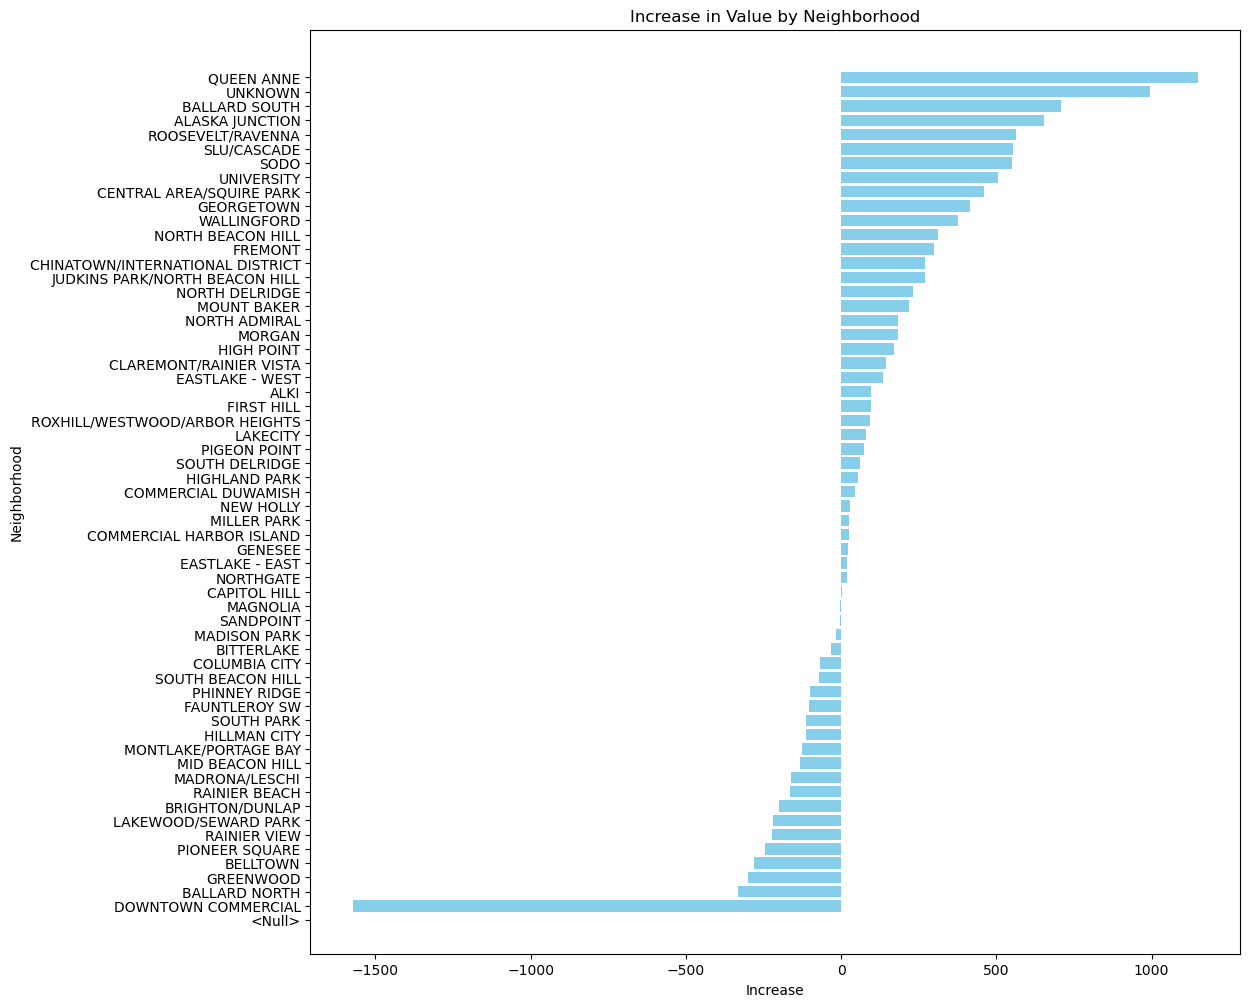

In [254]:
# Plot the increases
plt.figure(figsize=(12, 12))
plt.barh(increase_df['Neighborhood'], increase_df['Increase'], color='skyblue')
plt.xlabel('Increase')
plt.ylabel('Neighborhood')
plt.title('Increase in Value by Neighborhood')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest increase at the top
plt.show()

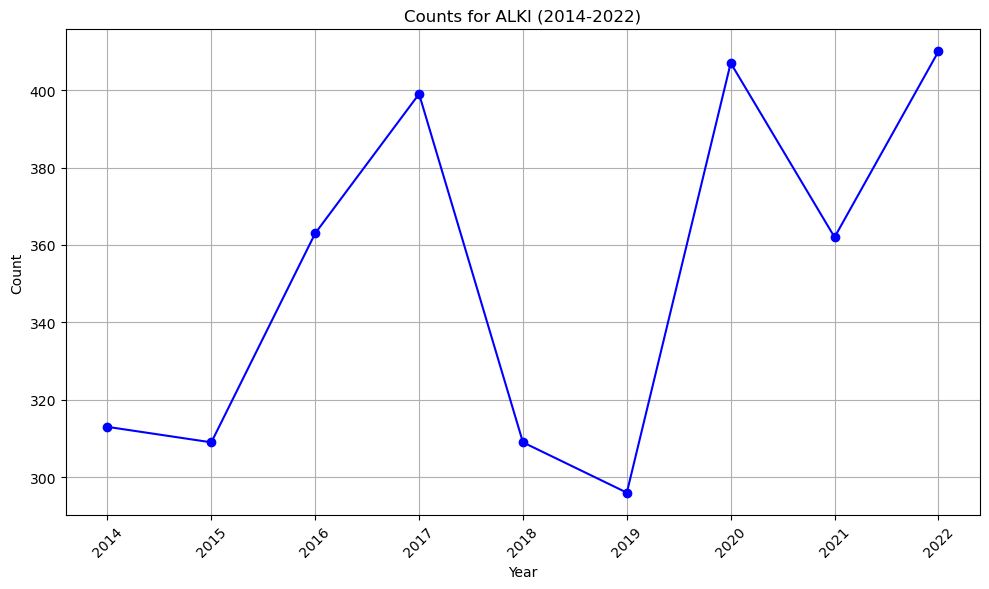

In [255]:
plt.figure(figsize=(10, 6))
plt.plot(summary_df.index, summary_df['ALKI'], marker='o', linestyle='-', color='b')
plt.title('Counts for ALKI (2014-2022)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot to fit labels

# Show the plot
plt.show()

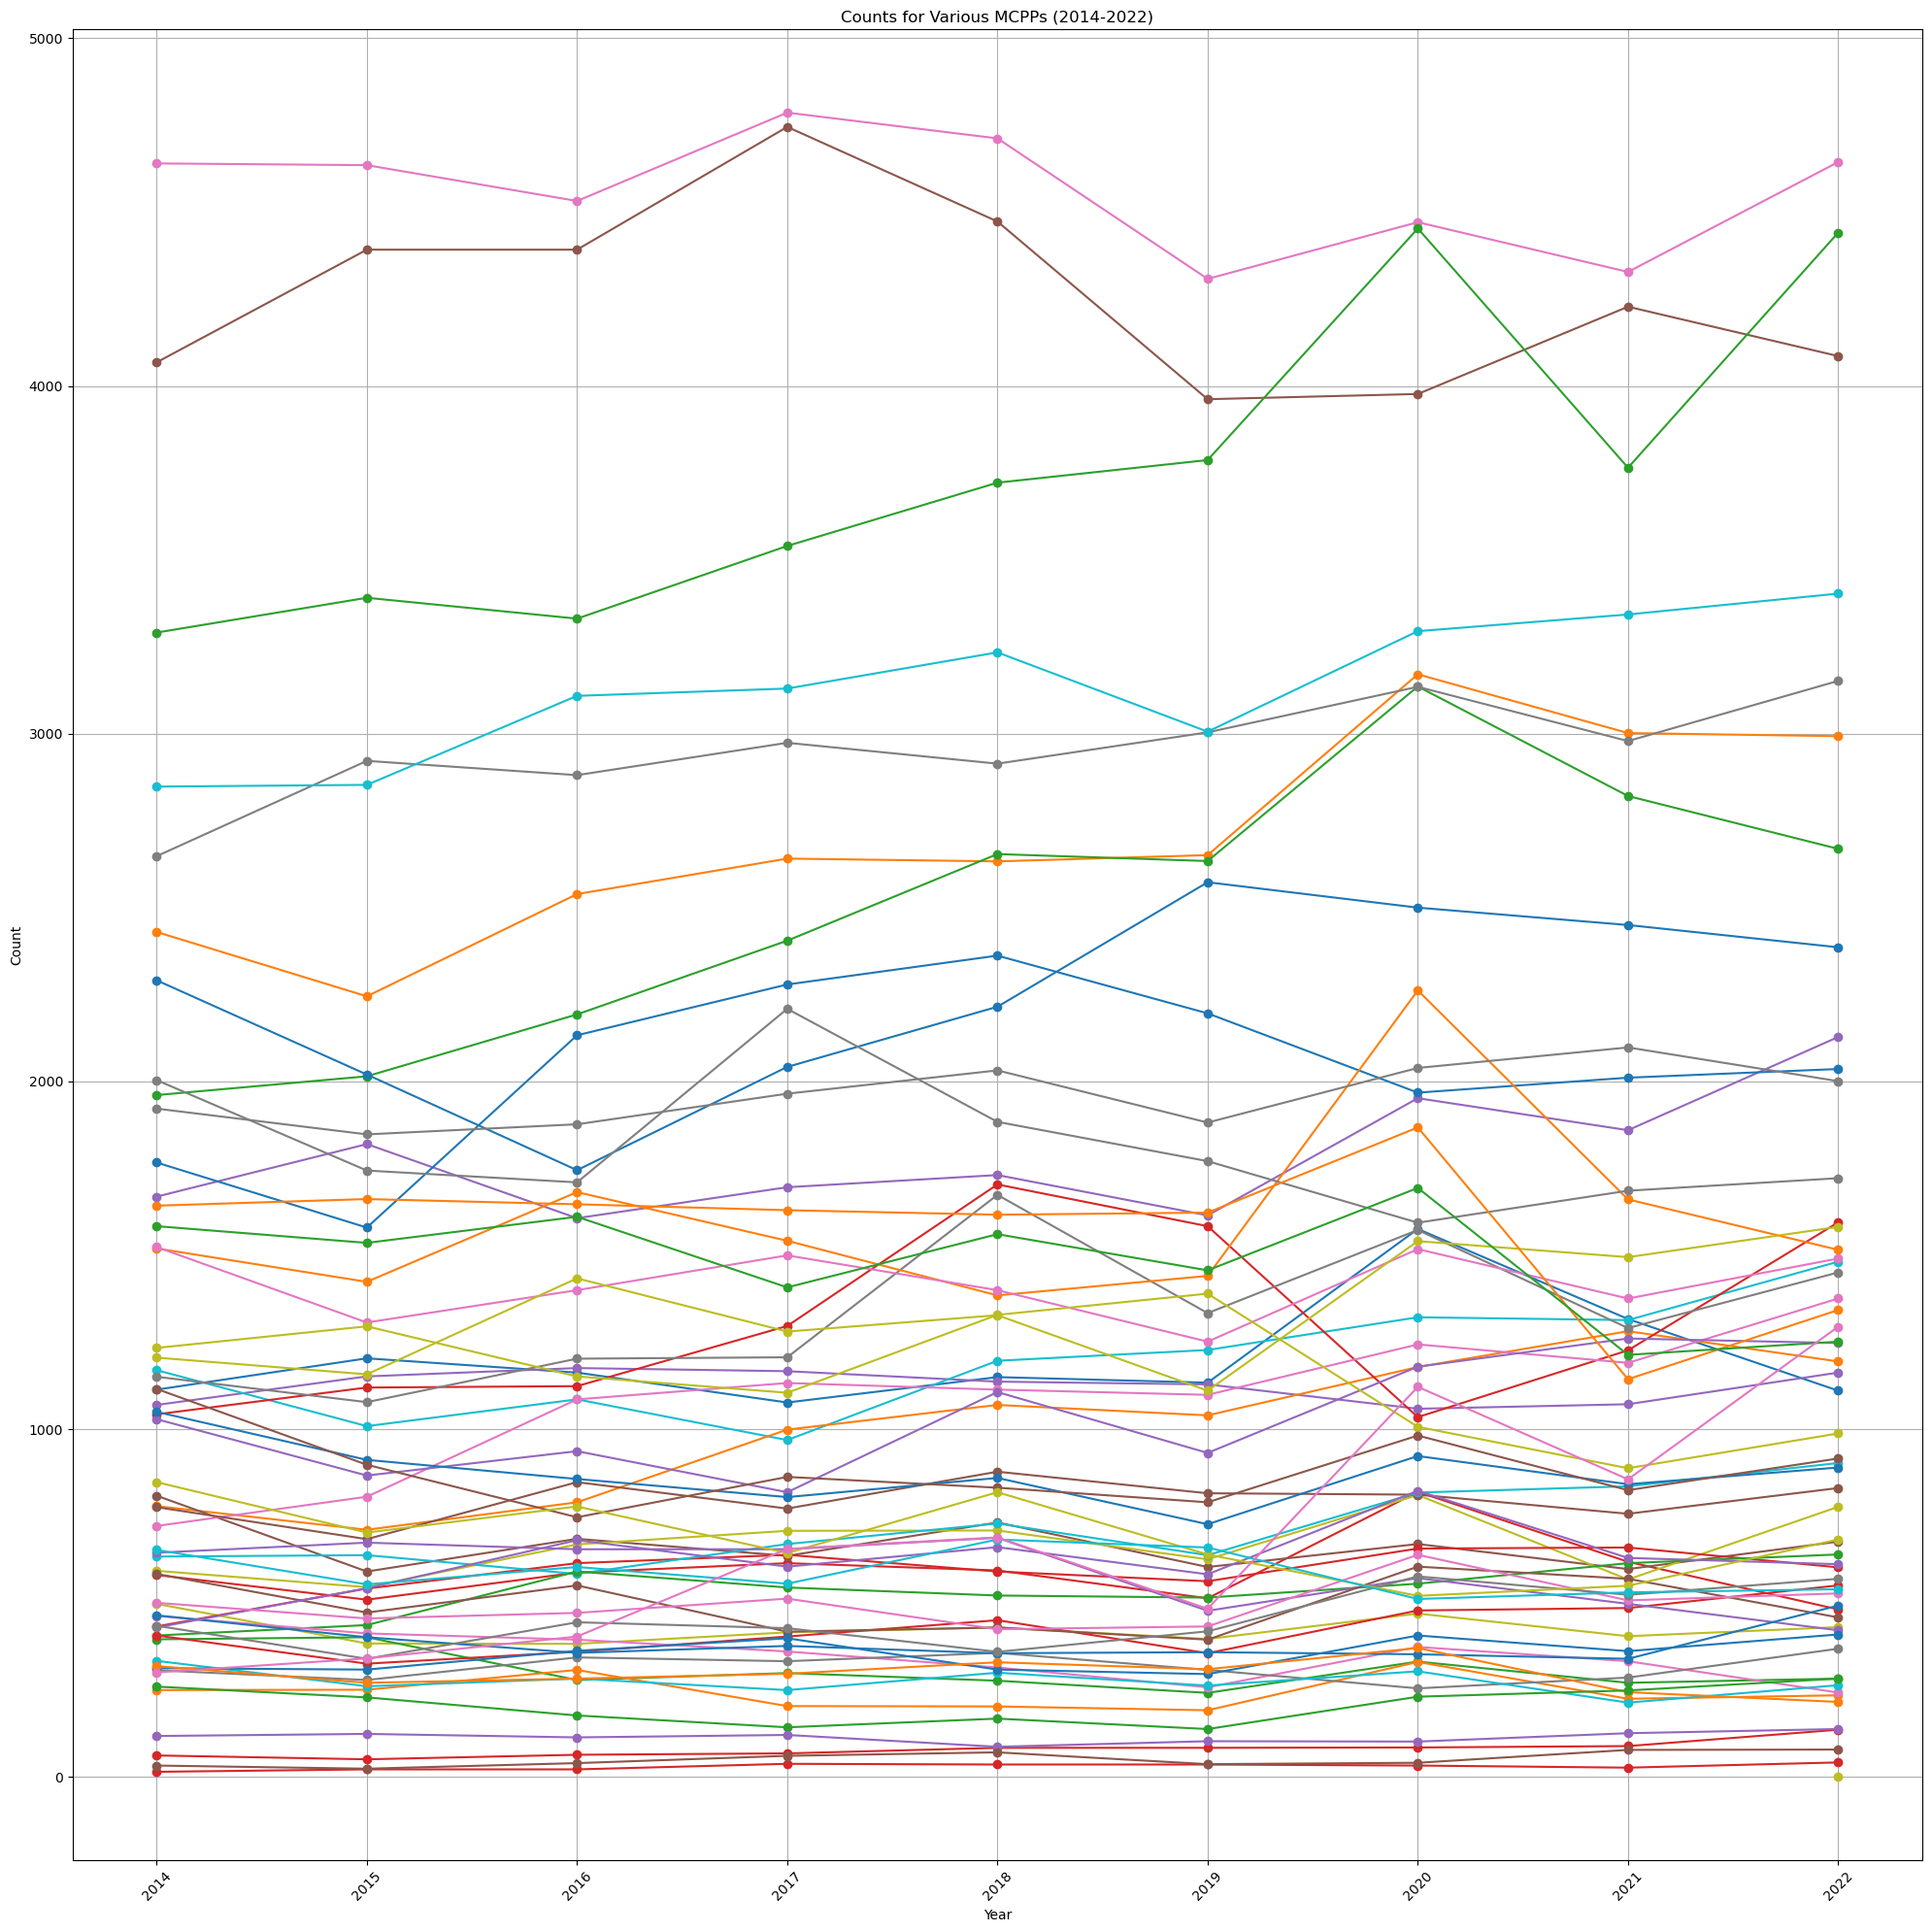

In [256]:
plt.figure(figsize=(20, 20))
for column in ['MAGNOLIA', 'ROOSEVELT/RAVENNA', 'BALLARD SOUTH',
       'PHINNEY RIDGE',
       'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'NORTHGATE', 'CAPITOL HILL',
       'UNIVERSITY', 'COLUMBIA CITY', 'NORTH BEACON HILL', 'FIRST HILL',
       'GEORGETOWN', 'QUEEN ANNE', 'SODO', 'CENTRAL AREA/SQUIRE PARK',
       'MID BEACON HILL', 'ALASKA JUNCTION', 'FREMONT', 'NORTH ADMIRAL',
       'SLU/CASCADE', 'CHINATOWN/INTERNATIONAL DISTRICT', 'SANDPOINT',
       'HILLMAN CITY', 'HIGH POINT', 'MOUNT BAKER', 'HIGHLAND PARK',
       'BITTERLAKE', 'BELLTOWN', 'PIONEER SQUARE',
       'JUDKINS PARK/NORTH BEACON HILL', 'MADRONA/LESCHI', 'MADISON PARK',
       'NORTH DELRIDGE', 'CLAREMONT/RAINIER VISTA', 'RAINIER VIEW',
       'MONTLAKE/PORTAGE BAY', 'LAKEWOOD/SEWARD PARK', 'SOUTH DELRIDGE',
       'WALLINGFORD', 'SOUTH BEACON HILL', 'NEW HOLLY', 'GREENWOOD',
       'BALLARD NORTH', 'PIGEON POINT', 'MORGAN', 'BRIGHTON/DUNLAP',
       'MILLER PARK', 'EASTLAKE - WEST', 'RAINIER BEACH', 'SOUTH PARK',
       'ALKI', 'FAUNTLEROY SW', 'GENESEE', 'COMMERCIAL HARBOR ISLAND',
       'EASTLAKE - EAST', 'COMMERCIAL DUWAMISH', 'UNKNOWN', 'LAKECITY',
       '<Null>', 'CASE/CASCAD', 'CHINATOWN/INTERNAITONAL DISTRICT']:
    if column in summary_df.columns:
        plt.plot(summary_df.index, summary_df[column], marker='o', linestyle='-', label=column)

plt.title('Counts for Various MCPPs (2014-2022)')
plt.xlabel('Year')
plt.ylabel('Count')
#plt.legend(title='MCPP')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot to fit labels

# Show the plot
plt.show()

In [257]:
# Define the start and end years
start_year = summary_df.index.min()
end_year = summary_df.index.max()

# Get the first and last values for each neighborhood
start_values = summary_df.loc[start_year]
end_values = summary_df.loc[end_year]

# Calculate the growth rate
growth_rate = ((end_values - start_values) / start_values) * 100

# Create a DataFrame to view the results
growth_rate_df = pd.DataFrame({
    'Neighborhood': growth_rate.index,
    'Growth Rate (%)': growth_rate.values
})

# Sort by growth rate in descending order
growth_rate_df = growth_rate_df.sort_values(by='Growth Rate (%)', ascending=False)

# Print the results
print(growth_rate_df)

                        Neighborhood  Growth Rate (%)
52                           UNKNOWN       330.232558
58          COMMERCIAL HARBOR ISLAND       180.000000
57               COMMERCIAL DUWAMISH       139.393939
56                      PIGEON POINT       119.354839
31                   ALASKA JUNCTION        90.581717
46                    NORTH DELRIDGE        57.248157
29                        GEORGETOWN        53.401797
25                              SODO        52.924257
34    JUDKINS PARK/NORTH BEACON HILL        42.429022
44                            MORGAN        42.325581
43                        HIGH POINT        39.260970
9                      BALLARD SOUTH        36.104029
45           CLAREMONT/RAINIER VISTA        35.380835
3                         QUEEN ANNE        34.943786
18                       WALLINGFORD        31.177446
42                   EASTLAKE - WEST        31.034483
35                     NORTH ADMIRAL        31.028668
50                          

In [258]:
# Assuming summary_df is already loaded and has years as index and neighborhoods as columns

# Calculate the annual growth rates
annual_growth_rates = summary_df.pct_change() * 100

# Calculate the average annual growth rate for each neighborhood
average_annual_growth_rates = annual_growth_rates.mean()

# Create a DataFrame to view the results
growth_rate_df = pd.DataFrame({
    'Neighborhood': average_annual_growth_rates.index,
    'Average Annual Growth Rate (%)': average_annual_growth_rates.values
})

# Sort by average annual growth rate in descending order
growth_rate_df = growth_rate_df.sort_values(by='Average Annual Growth Rate (%)', ascending=False)

# Print the results
print(growth_rate_df)


                        Neighborhood  Average Annual Growth Rate (%)
52                           UNKNOWN                       28.601642
57               COMMERCIAL DUWAMISH                       20.342103
58          COMMERCIAL HARBOR ISLAND                       17.896398
56                      PIGEON POINT                       12.029127
31                   ALASKA JUNCTION                        9.018085
25                              SODO                        7.669061
44                            MORGAN                        6.605965
46                    NORTH DELRIDGE                        6.485843
29                        GEORGETOWN                        6.057046
35                     NORTH ADMIRAL                        5.656420
42                   EASTLAKE - WEST                        5.378263
45           CLAREMONT/RAINIER VISTA                        5.338217
34    JUDKINS PARK/NORTH BEACON HILL                        5.205515
50                              AL

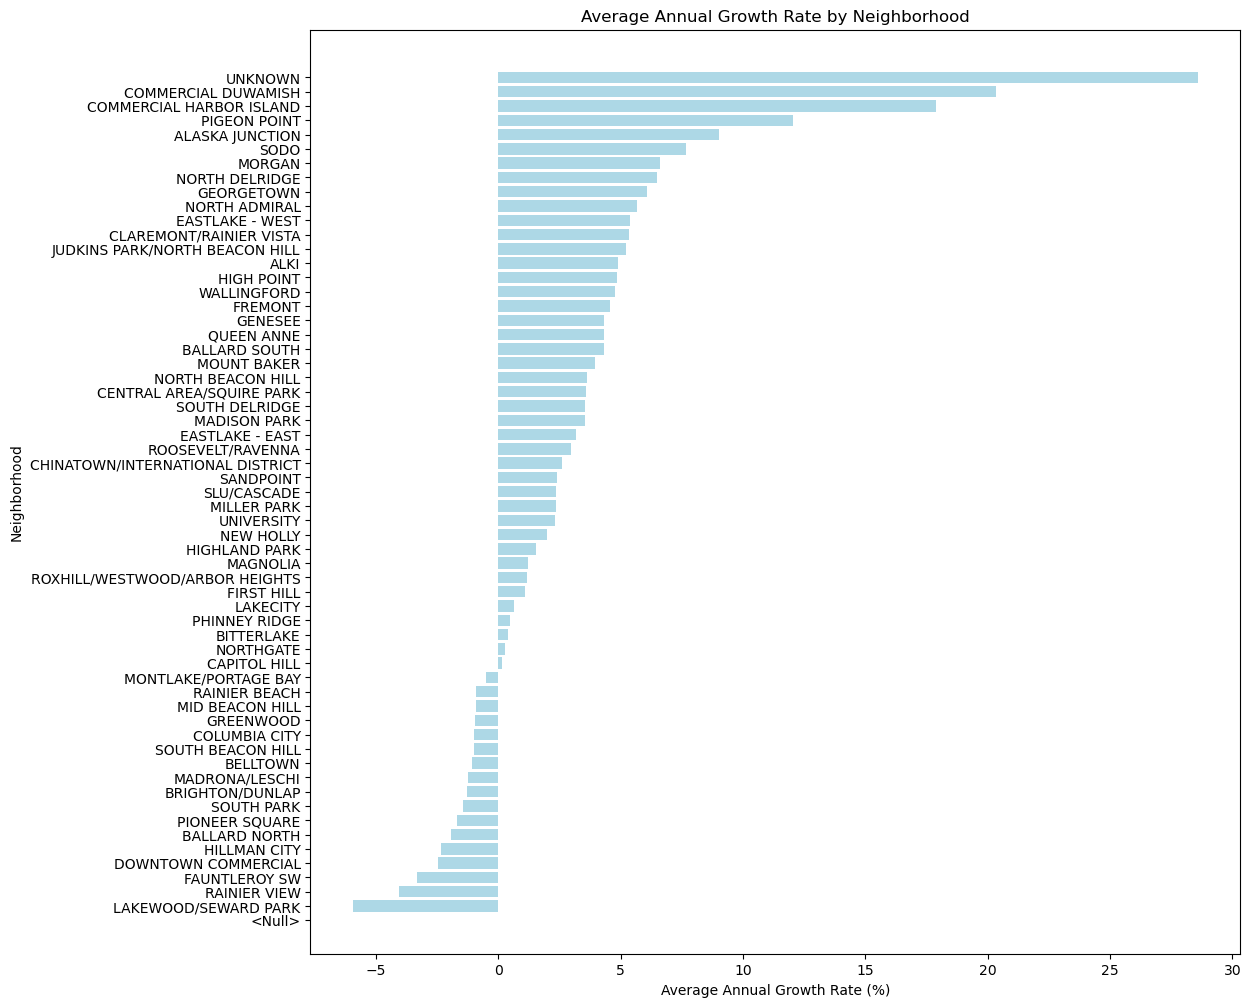

In [259]:

# Plot the average annual growth rates
plt.figure(figsize=(12, 12))
plt.barh(growth_rate_df['Neighborhood'], growth_rate_df['Average Annual Growth Rate (%)'], color='lightblue')
plt.xlabel('Average Annual Growth Rate (%)')
plt.ylabel('Neighborhood')
plt.title('Average Annual Growth Rate by Neighborhood')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest growth rate at the top
plt.show()

In [260]:
# Assuming `summary_df` is your DataFrame with years as index and neighborhoods as columns

# Calculate the annual growth rates (percentage change)
annual_growth_rates = summary_df.pct_change() * 100

# Display the annual growth rates DataFrame
print("Annual Growth Rates (%):")
print(annual_growth_rates)

# Optional: Aggregate or analyze the growth rates
# For example, you might want to calculate average annual growth rate for each neighborhood
average_growth_rates = annual_growth_rates.mean()

# Create a DataFrame to summarize the average annual growth rate for each neighborhood
growth_summary_df = pd.DataFrame({
    'Neighborhood': average_growth_rates.index,
    'Average Annual Growth Rate (%)': average_growth_rates.values
})

# Sort by average annual growth rate in descending order
growth_summary_df = growth_summary_df.sort_values(by='Average Annual Growth Rate (%)', ascending=False)

# Print the summary DataFrame
print("\nAverage Annual Growth Rates by Neighborhood:")
print(growth_summary_df)

Annual Growth Rates (%):
mcpp  DOWNTOWN COMMERCIAL  CAPITOL HILL  NORTHGATE  QUEEN ANNE  SLU/CASCADE  \
2014                  NaN           NaN        NaN         NaN          NaN   
2015             4.512490     -0.107759   7.964602    3.038590     0.175562   
2016            -2.945258     -2.222222   0.000000   -1.769390     8.973011   
2017            11.868446      5.604590   8.037341    6.274392     0.675458   
2018            -0.809544     -1.546176  -5.732350    5.141243     3.322684   
2019           -11.827033     -8.573854 -11.424100    1.746373    -7.050093   
2020           -33.712244      3.783658   0.378597   17.586480     9.614105   
2021             2.425282     -3.198390   6.311290  -15.450258     1.456753   
2022            10.786893      7.301294  -3.358562   17.954847     1.794795   

mcpp  UNIVERSITY  ROOSEVELT/RAVENNA  FIRST HILL   BELLTOWN  BALLARD SOUTH  \
2014         NaN                NaN         NaN        NaN            NaN   
2015   10.347432          -7.6

In [261]:
growth_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 52 to 59
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighborhood                    60 non-null     object 
 1   Average Annual Growth Rate (%)  59 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [262]:
# Calculate the annual growth rates (percentage change)
annual_growth_rates = summary_df.pct_change() * 100

# Add the 'Year' column to the growth rates DataFrame
annual_growth_rates = annual_growth_rates.reset_index()
annual_growth_rates.rename(columns={'index': 'Year'}, inplace=True)

# Melt the DataFrame to long format
long_format_df = pd.melt(annual_growth_rates, id_vars=['Year'], var_name='Neighborhood', value_name='Annual Growth Rate (%)')

# Display the long format DataFrame
print("Long Format DataFrame with Annual Growth Rates:")
print(long_format_df)

# Optional: Aggregate or analyze the growth rates
# Calculate average annual growth rate for each neighborhood
average_growth_rates = long_format_df.groupby('Neighborhood')['Annual Growth Rate (%)'].mean()

# Create a DataFrame to summarize the average annual growth rate for each neighborhood
growth_summary_df = pd.DataFrame({
    'Neighborhood': average_growth_rates.index,
    'Average Annual Growth Rate (%)': average_growth_rates.values
})

# Sort by average annual growth rate in descending order
growth_summary_df = growth_summary_df.sort_values(by='Average Annual Growth Rate (%)', ascending=False)

# Print the summary DataFrame
print("\nAverage Annual Growth Rates by Neighborhood:")
print(growth_summary_df)


Long Format DataFrame with Annual Growth Rates:
     Year         Neighborhood  Annual Growth Rate (%)
0    2014  DOWNTOWN COMMERCIAL                     NaN
1    2015  DOWNTOWN COMMERCIAL                4.512490
2    2016  DOWNTOWN COMMERCIAL               -2.945258
3    2017  DOWNTOWN COMMERCIAL               11.868446
4    2018  DOWNTOWN COMMERCIAL               -0.809544
..    ...                  ...                     ...
535  2018               <Null>                     NaN
536  2019               <Null>                     NaN
537  2020               <Null>                     NaN
538  2021               <Null>                     NaN
539  2022               <Null>                     NaN

[540 rows x 3 columns]

Average Annual Growth Rates by Neighborhood:
                        Neighborhood  Average Annual Growth Rate (%)
58                           UNKNOWN                       28.601642
13               COMMERCIAL DUWAMISH                       20.342103
14          COM

In [274]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
   # print(long_format_df)

In [401]:
long_format_df = long_format_df.dropna()
long_format_df 

,Year,Neighborhood,Annual Growth Rate (%)
1,2015,DOWNTOWN COMMERCIAL,4.512490
2,2016,DOWNTOWN COMMERCIAL,-2.945258
3,2017,DOWNTOWN COMMERCIAL,11.868446
4,2018,DOWNTOWN COMMERCIAL,-0.809544
5,2019,DOWNTOWN COMMERCIAL,-11.827033
...,...,...,...
526,2018,COMMERCIAL HARBOR ISLAND,-5.263158
527,2019,COMMERCIAL HARBOR ISLAND,0.000000
528,2020,COMMERCIAL HARBOR ISLAND,-8.333333
529,2021,COMMERCIAL HARBOR ISLAND,-18.181818


In [402]:
# Group by Year and Neighborhood
grouped_df = long_format_df.groupby(['Year', 'Neighborhood'])['Annual Growth Rate (%)'].mean().reset_index()

# Pivot the DataFrame to make neighborhoods as columns
pivot_df = grouped_df.pivot(index='Year', columns='Neighborhood', values='Annual Growth Rate (%)')

# Reset the index to make 'Year' a column and not the index
pivot_df = pivot_df.reset_index()

# Display the pivoted DataFrame
print("Pivoted DataFrame:")
print(pivot_df)


Pivoted DataFrame:
Neighborhood  Year  ALASKA JUNCTION       ALKI  BALLARD NORTH  BALLARD SOUTH  \
0             2015        11.634349  -1.277955      -3.030303       2.753697   
1             2016        34.739454  17.475728       4.882812       8.833747   
2             2017         4.327808   9.917355     -12.600869       9.667123   
3             2018        -1.676964 -22.556391      10.866477      10.353430   
4             2019        -1.346499  -4.207120      -6.662396      -0.753580   
5             2020        13.193813  37.500000      16.266301      19.058466   
6             2021        -4.260450 -11.056511     -28.335301     -10.044643   
7             2022        15.533165  13.259669       3.130148      -5.388160   

Neighborhood   BELLTOWN  BITTERLAKE  BRIGHTON/DUNLAP  CAPITOL HILL  \
0            -12.974052  -14.238845       -19.534050     -0.107759   
1             -1.949541    7.115532       -16.815145     -2.222222   
2             29.181287    7.142857        15.5287

In [403]:
summary_df

mcpp,level_0,index,DOWNTOWN COMMERCIAL,CAPITOL HILL,NORTHGATE,QUEEN ANNE,SLU/CASCADE,UNIVERSITY,ROOSEVELT/RAVENNA,FIRST HILL,...,ALKI,SOUTH DELRIDGE,UNKNOWN,GENESEE,MADISON PARK,EASTLAKE - EAST,PIGEON POINT,COMMERCIAL DUWAMISH,COMMERCIAL HARBOR ISLAND,<Null>
0,0,2014,6205,4640,4068,3291,2848,2648,2430,2291,...,313,307,301,260,250,118,62,33,15,NaN
1,1,2015,6485,4635,4392,3391,2853,2922,2245,2020,...,309,279,341,229,251,124,51,24,22,NaN
2,2,2016,6294,4532,4392,3331,3109,2881,2539,1745,...,363,344,404,177,308,114,64,40,22,NaN
3,3,2017,7041,4786,4745,3540,3130,2974,2641,2042,...,399,333,656,143,204,121,68,61,38,NaN
4,4,2018,6984,4712,4473,3722,3234,2914,2633,2215,...,309,357,689,168,203,87,84,71,36,NaN
5,5,2019,6158,4308,3962,3787,3006,3004,2651,2573,...,296,308,484,138,192,103,84,37,36,NaN
6,6,2020,4082,4471,3977,4453,3295,3135,3171,2500,...,407,255,1122,231,331,102,85,41,33,NaN
7,7,2021,4181,4328,4228,3765,3343,2979,3002,2450,...,362,286,856,249,225,126,89,78,27,NaN
8,8,2022,4632,4644,4086,4441,3403,3152,2993,2386,...,410,369,1295,283,235,138,136,79,42,1.0


In [404]:
print(summary_df.columns.to_list())
summary_df.reset_index(inplace=True)

['level_0', 'index', 'DOWNTOWN COMMERCIAL', 'CAPITOL HILL', 'NORTHGATE', 'QUEEN ANNE', 'SLU/CASCADE', 'UNIVERSITY', 'ROOSEVELT/RAVENNA', 'FIRST HILL', 'BELLTOWN', 'BALLARD SOUTH', 'LAKECITY', 'CHINATOWN/INTERNATIONAL DISTRICT', 'CENTRAL AREA/SQUIRE PARK', 'GREENWOOD', 'BALLARD NORTH', 'BITTERLAKE', 'SANDPOINT', 'PIONEER SQUARE', 'WALLINGFORD', 'NORTH BEACON HILL', 'FREMONT', 'BRIGHTON/DUNLAP', 'MAGNOLIA', 'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'MADRONA/LESCHI', 'SODO', 'MOUNT BAKER', 'RAINIER BEACH', 'MID BEACON HILL', 'GEORGETOWN', 'HIGHLAND PARK', 'ALASKA JUNCTION', 'SOUTH PARK', 'RAINIER VIEW', 'JUDKINS PARK/NORTH BEACON HILL', 'NORTH ADMIRAL', 'MONTLAKE/PORTAGE BAY', 'PHINNEY RIDGE', 'MILLER PARK', 'COLUMBIA CITY', 'NEW HOLLY', 'LAKEWOOD/SEWARD PARK', 'EASTLAKE - WEST', 'HIGH POINT', 'MORGAN', 'CLAREMONT/RAINIER VISTA', 'NORTH DELRIDGE', 'HILLMAN CITY', 'SOUTH BEACON HILL', 'FAUNTLEROY SW', 'ALKI', 'SOUTH DELRIDGE', 'UNKNOWN', 'GENESEE', 'MADISON PARK', 'EASTLAKE - EAST', 'PIGEON POINT'

ValueError: cannot insert level_0, already exists

In [405]:
summary_df_melt = pd.melt(summary_df,                                        # dataset
                        id_vars=['index'],      # Column(s) to use as identifier variables
                        value_vars= ['DOWNTOWN COMMERCIAL', 'CAPITOL HILL', 'NORTHGATE', 'QUEEN ANNE', 'SLU/CASCADE', 'UNIVERSITY', 'ROOSEVELT/RAVENNA', 'FIRST HILL', 'BELLTOWN', 'BALLARD SOUTH', 'LAKECITY', 'CHINATOWN/INTERNATIONAL DISTRICT', 'CENTRAL AREA/SQUIRE PARK', 'GREENWOOD', 'BALLARD NORTH', 'BITTERLAKE', 'SANDPOINT', 'PIONEER SQUARE', 'WALLINGFORD', 'NORTH BEACON HILL', 'FREMONT', 'BRIGHTON/DUNLAP', 'MAGNOLIA', 'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'MADRONA/LESCHI', 'SODO', 'MOUNT BAKER', 'RAINIER BEACH', 'MID BEACON HILL', 'GEORGETOWN', 'HIGHLAND PARK', 'ALASKA JUNCTION', 'SOUTH PARK', 'RAINIER VIEW', 'JUDKINS PARK/NORTH BEACON HILL', 'NORTH ADMIRAL', 'MONTLAKE/PORTAGE BAY', 'PHINNEY RIDGE', 'MILLER PARK', 'COLUMBIA CITY', 'NEW HOLLY', 'LAKEWOOD/SEWARD PARK', 'EASTLAKE - WEST', 'HIGH POINT', 'MORGAN', 'CLAREMONT/RAINIER VISTA', 'NORTH DELRIDGE', 'HILLMAN CITY', 'SOUTH BEACON HILL', 'FAUNTLEROY SW', 'ALKI', 'SOUTH DELRIDGE', 'UNKNOWN', 'GENESEE', 'MADISON PARK', 'EASTLAKE - EAST', 'PIGEON POINT', 'COMMERCIAL DUWAMISH', 'COMMERCIAL HARBOR ISLAND', '<Null>'],                    # Name to use for the ‘variable’ column    
                        var_name='neighbourhood',                     # Name to use for the ‘variable’ column
                        value_name='reporting_nb')                           # Name to use for the ‘value’ column

In [406]:
summary_df_melt = summary_df_melt.dropna()

In [407]:
summary_df_melt

,index,neighbourhood,reporting_nb
0,2014,DOWNTOWN COMMERCIAL,6205.0
1,2015,DOWNTOWN COMMERCIAL,6485.0
2,2016,DOWNTOWN COMMERCIAL,6294.0
3,2017,DOWNTOWN COMMERCIAL,7041.0
4,2018,DOWNTOWN COMMERCIAL,6984.0
...,...,...,...
527,2019,COMMERCIAL HARBOR ISLAND,36.0
528,2020,COMMERCIAL HARBOR ISLAND,33.0
529,2021,COMMERCIAL HARBOR ISLAND,27.0
530,2022,COMMERCIAL HARBOR ISLAND,42.0


In [408]:
# 2014 - 2022
summary_agr = summary_df_melt.groupby(['neighbourhood'])['reporting_nb'].mean().reset_index()

In [409]:
#2015 - 2020
#summary_df_2020 = summary_df_melt[summary_df_melt['index'] == '2020']

In [410]:
# put in a new df
summary_agr = pd.DataFrame(summary_agr)

In [411]:
#reporting_nb 2014 - 2022 and the mean values
summary_agr

,neighbourhood,reporting_nb
0,<Null>,1.000000
1,ALASKA JUNCTION,1085.666667
2,ALKI,352.000000
3,BALLARD NORTH,1479.666667
4,BALLARD SOUTH,2498.666667
5,BELLTOWN,1813.777778
6,BITTERLAKE,1418.666667
7,BRIGHTON/DUNLAP,885.444444
8,CAPITOL HILL,4561.777778
9,CENTRAL AREA/SQUIRE PARK,1786.444444


In [412]:
summary_agr['neighbourhood'].unique()

array(['<Null>', 'ALASKA JUNCTION', 'ALKI', 'BALLARD NORTH',
       'BALLARD SOUTH', 'BELLTOWN', 'BITTERLAKE', 'BRIGHTON/DUNLAP',
       'CAPITOL HILL', 'CENTRAL AREA/SQUIRE PARK',
       'CHINATOWN/INTERNATIONAL DISTRICT', 'CLAREMONT/RAINIER VISTA',
       'COLUMBIA CITY', 'COMMERCIAL DUWAMISH', 'COMMERCIAL HARBOR ISLAND',
       'DOWNTOWN COMMERCIAL', 'EASTLAKE - EAST', 'EASTLAKE - WEST',
       'FAUNTLEROY SW', 'FIRST HILL', 'FREMONT', 'GENESEE', 'GEORGETOWN',
       'GREENWOOD', 'HIGH POINT', 'HIGHLAND PARK', 'HILLMAN CITY',
       'JUDKINS PARK/NORTH BEACON HILL', 'LAKECITY',
       'LAKEWOOD/SEWARD PARK', 'MADISON PARK', 'MADRONA/LESCHI',
       'MAGNOLIA', 'MID BEACON HILL', 'MILLER PARK',
       'MONTLAKE/PORTAGE BAY', 'MORGAN', 'MOUNT BAKER', 'NEW HOLLY',
       'NORTH ADMIRAL', 'NORTH BEACON HILL', 'NORTH DELRIDGE',
       'NORTHGATE', 'PHINNEY RIDGE', 'PIGEON POINT', 'PIONEER SQUARE',
       'QUEEN ANNE', 'RAINIER BEACH', 'RAINIER VIEW', 'ROOSEVELT/RAVENNA',
       'ROXHILL/

In [413]:
language_per_neighborhood

,Neighborhood Name,Speaks Another Language,Speaks English Less than Very Well,Households with Limited English
0,23rd & Union-Jackson,3059,1615,304
1,Madrona/Leschi,6384,1216,133
2,Central Area/Squire Park,6384,1216,133
3,Judkins Park,6384,1216,133
4,Olympic Hills/Victory Heights,6954,1862,513
...,...,...,...,...
57,Seward Park,57266,27531,9272
58,Rainier Beach,57266,27531,9272
59,Mt. Baker/North Rainier,57266,27531,9272
60,North Beacon Hill,110922,70376,15390


In [414]:
# look for unique names to map
language_per_neighborhood['Neighborhood Name'].unique()

array(['23rd & Union-Jackson', 'Madrona/Leschi',
       'Central Area/Squire Park', 'Judkins Park',
       'Olympic Hills/Victory Heights', 'Northgate/Maple Leaf',
       'Cedar Park/Meadowbrook', 'Whittier Heights', 'Ballard',
       'Sunset Hill/Loyal Heights', 'North Beach/Blue Ridge',
       'Haller Lake', 'Greenwood/Phinney Ridge', 'Green Lake',
       'Licton Springs', 'Broadview/Bitter Lake', 'Fremont',
       'Cascade/Eastlake', 'Wallingford', 'South Beacon Hill/NewHolly',
       'Duwamish/SODO', 'South Park', 'North Beacon Hill/Jefferson Park',
       'Beacon Hill', 'Georgetown', 'Upper Queen Anne',
       'Greenwood-Phinney Ridge', 'Admiral', 'Laurelhurst/Sand Point',
       'University District', 'Montlake/Portage Bay', 'Ravenna/Bryant',
       'Wedgwood/View Ridge', 'Pioneer Square/International District',
       'Belltown', 'Downtown Commercial Core', 'Crown Hill', 'Magnolia',
       'Interbay', 'Queen Anne', 'Fauntleroy/Seaview', 'Arbor Heights',
       'West Seattle Junc

In [415]:
neighborhood_mapping = {
    '23rd & Union-Jackson': '23rd & Union-Jackson',
    'Madrona/Leschi': 'MADISON PARK',
    'Central Area/Squire Park': 'CENTRAL AREA/SQUIRE PARK',
    'Judkins Park': 'JUDKINS PARK/NORTH BEACON HILL',
    'Olympic Hills/Victory Heights': None,
    'Northgate/Maple Leaf': 'NORTHGATE',
    'Cedar Park/Meadowbrook': None,
    'Whittier Heights': 'BITTERLAKE',
    'Ballard': 'BALLARD SOUTH',
    'Sunset Hill/Loyal Heights': None,
    'North Beach/Blue Ridge': None,
    'Haller Lake': None,
    'Greenwood/Phinney Ridge': 'GREENWOOD',
    'Green Lake': None,
    'Licton Springs': None,
    'Broadview/Bitter Lake': 'BITTERLAKE',
    'Fremont': 'FREMONT',
    'Cascade/Eastlake': 'EASTLAKE - EAST',
    'Wallingford': 'WALLINGFORD',
    'South Beacon Hill/NewHolly': 'SOUTH BEACON HILL',
    'Duwamish/SODO': 'COMMERCIAL DUWAMISH',
    'South Park': 'SOUTH PARK',
    'North Beacon Hill/Jefferson Park': 'NORTH BEACON HILL',
    'Beacon Hill': 'BEACON HILL',
    'Georgetown': 'GEORGETOWN',
    'Upper Queen Anne': 'QUEEN ANNE',
    'Greenwood-Phinney Ridge': 'GREENWOOD',
    'Admiral': 'NORTH ADMIRAL',
    'Laurelhurst/Sand Point': 'SANDPOINT',
    'University District': 'UNIVERSITY',
    'Montlake/Portage Bay': 'MONTLAKE/PORTAGE BAY',
    'Ravenna/Bryant': 'ROOSEVELT/RAVENNA',
    'Wedgwood/View Ridge': None,
    'Pioneer Square/International District': 'PIONEER SQUARE',
    'Belltown': 'BELLTOWN',
    'Downtown Commercial Core': 'DOWNTOWN COMMERCIAL',
    'Crown Hill': None,
    'Magnolia': 'MAGNOLIA',
    'Interbay': None,
    'Queen Anne': 'QUEEN ANNE',
    'Fauntleroy/Seaview': 'FAUNTLEROY SW',
    'Arbor Heights': 'ROXHILL/WESTWOOD/ARBOR HEIGHTS',
    'West Seattle Junction/Genesee Hill': 'GENESEE',
    'Alki/Admiral': 'ALKI',
    'North Capitol Hill': 'CAPITOL HILL',
    'Capitol Hill': 'CAPITOL HILL',
    'Miller Park': 'MILLER PARK',
    'Madison Park': 'MADISON PARK',
    'First Hill': 'FIRST HILL',
    'Aurora-Licton Springs': None,
    'Bitter Lake Village': 'BITTERLAKE',
    'Eastlake': 'EASTLAKE - EAST',
    'Riverview': None,
    'Roxhill/Westwood': 'ROXHILL/WESTWOOD/ARBOR HEIGHTS',
    'North Delridge': 'NORTH DELRIDGE',
    'Highland Park': 'HIGHLAND PARK',
    'High Point': 'HIGH POINT',
    'Seward Park': 'SEWARD PARK',
    'Rainier Beach': 'RAINIER BEACH',
    'Mt. Baker/North Rainier': 'MOUNT BAKER',
    'North Beacon Hill': 'NORTH BEACON HILL',
    'Columbia City': 'COLUMBIA CITY'
}

In [416]:
#summary_agr 
#language_per_neighborhood
#summary_agr['mapped_neighborhood'] = summary_agr['neighbourhood'].map(neighborhood_mapping).fillna(summary_agr['neighbourhood'])
language_per_neighborhood['neighbourhood'] = language_per_neighborhood['Neighborhood Name'].map(neighborhood_mapping).fillna(language_per_neighborhood['Neighborhood Name'])


In [417]:
language_per_neighborhood.drop(columns='mapped_neighborhood', inplace = True)

KeyError: "['mapped_neighborhood'] not found in axis"

In [418]:
# reporting_nb is aggregated (mean) from 2014 - 2022
# Speaks EN or not is a Count 2015-2022
neighborhood_merged = language_per_neighborhood.merge(summary_agr, on= 'neighbourhood')

In [422]:
neighborhood_merged

,Neighborhood Name,Speaks Another Language,Speaks English Less than Very Well,Households with Limited English,neighbourhood,reporting_nb
0,Madrona/Leschi,6384,1216,133,MADISON PARK,244.333333
1,Madison Park,37430,15732,4541,MADISON PARK,244.333333
2,Central Area/Squire Park,6384,1216,133,CENTRAL AREA/SQUIRE PARK,1786.444444
3,Judkins Park,6384,1216,133,JUDKINS PARK/NORTH BEACON HILL,716.666667
4,Northgate/Maple Leaf,6954,1862,513,NORTHGATE,4258.111111
5,Whittier Heights,7619,2983,988,BITTERLAKE,1418.666667
6,Broadview/Bitter Lake,8265,3287,912,BITTERLAKE,1418.666667
7,Bitter Lake Village,46303,19817,4712,BITTERLAKE,1418.666667
8,Ballard,7619,2983,988,BALLARD SOUTH,2498.666667
9,Greenwood/Phinney Ridge,8265,3287,912,GREENWOOD,1575.222222


In [425]:
neighborhood_merged['total population'] = neighborhood_merged['Speaks Another Language'] + neighborhood_merged['Speaks English Less than Very Well'] + neighborhood_merged['Households with Limited English'] #+ neighborhood_merged['Speaks English']

In [426]:
neighborhood_merged

,Neighborhood Name,Speaks Another Language,Speaks English Less than Very Well,Households with Limited English,neighbourhood,reporting_nb,total population
0,Madrona/Leschi,6384,1216,133,MADISON PARK,244.333333,7733
1,Madison Park,37430,15732,4541,MADISON PARK,244.333333,57703
2,Central Area/Squire Park,6384,1216,133,CENTRAL AREA/SQUIRE PARK,1786.444444,7733
3,Judkins Park,6384,1216,133,JUDKINS PARK/NORTH BEACON HILL,716.666667,7733
4,Northgate/Maple Leaf,6954,1862,513,NORTHGATE,4258.111111,9329
5,Whittier Heights,7619,2983,988,BITTERLAKE,1418.666667,11590
6,Broadview/Bitter Lake,8265,3287,912,BITTERLAKE,1418.666667,12464
7,Bitter Lake Village,46303,19817,4712,BITTERLAKE,1418.666667,70832
8,Ballard,7619,2983,988,BALLARD SOUTH,2498.666667,11590
9,Greenwood/Phinney Ridge,8265,3287,912,GREENWOOD,1575.222222,12464


In [427]:
# Calculate the percentages
neighborhood_merged['Speaks Another Language (%)'] = (neighborhood_merged['Speaks Another Language'] / neighborhood_merged['total population']) * 100
neighborhood_merged['Speaks English Less than Very Well (%)'] = (neighborhood_merged['Speaks English Less than Very Well'] / neighborhood_merged['total population']) * 100
neighborhood_merged['Households with Limited English (%)'] = (neighborhood_merged['Households with Limited English'] / neighborhood_merged['total population']) * 100
#language_per_neighborhood['Speaks English (%)'] = (language_per_neighborhood['Speaks English'] / language_per_neighborhood['total population']) * 100

# Drop the original count columns if you no longer need them
language_2020 = neighborhood_merged.drop(columns=['Speaks Another Language', 'Speaks English Less than Very Well', 'Households with Limited English'])

In [428]:
language_2020

,Neighborhood Name,neighbourhood,reporting_nb,total population,Speaks Another Language (%),Speaks English Less than Very Well (%),Households with Limited English (%)
0,Madrona/Leschi,MADISON PARK,244.333333,7733,82.555283,15.724816,1.719902
1,Madison Park,MADISON PARK,244.333333,57703,64.866645,27.263747,7.869608
2,Central Area/Squire Park,CENTRAL AREA/SQUIRE PARK,1786.444444,7733,82.555283,15.724816,1.719902
3,Judkins Park,JUDKINS PARK/NORTH BEACON HILL,716.666667,7733,82.555283,15.724816,1.719902
4,Northgate/Maple Leaf,NORTHGATE,4258.111111,9329,74.541752,19.959267,5.498982
5,Whittier Heights,BITTERLAKE,1418.666667,11590,65.737705,25.737705,8.524590
6,Broadview/Bitter Lake,BITTERLAKE,1418.666667,12464,66.310976,26.371951,7.317073
7,Bitter Lake Village,BITTERLAKE,1418.666667,70832,65.370172,27.977468,6.652361
8,Ballard,BALLARD SOUTH,2498.666667,11590,65.737705,25.737705,8.524590
9,Greenwood/Phinney Ridge,GREENWOOD,1575.222222,12464,66.310976,26.371951,7.317073


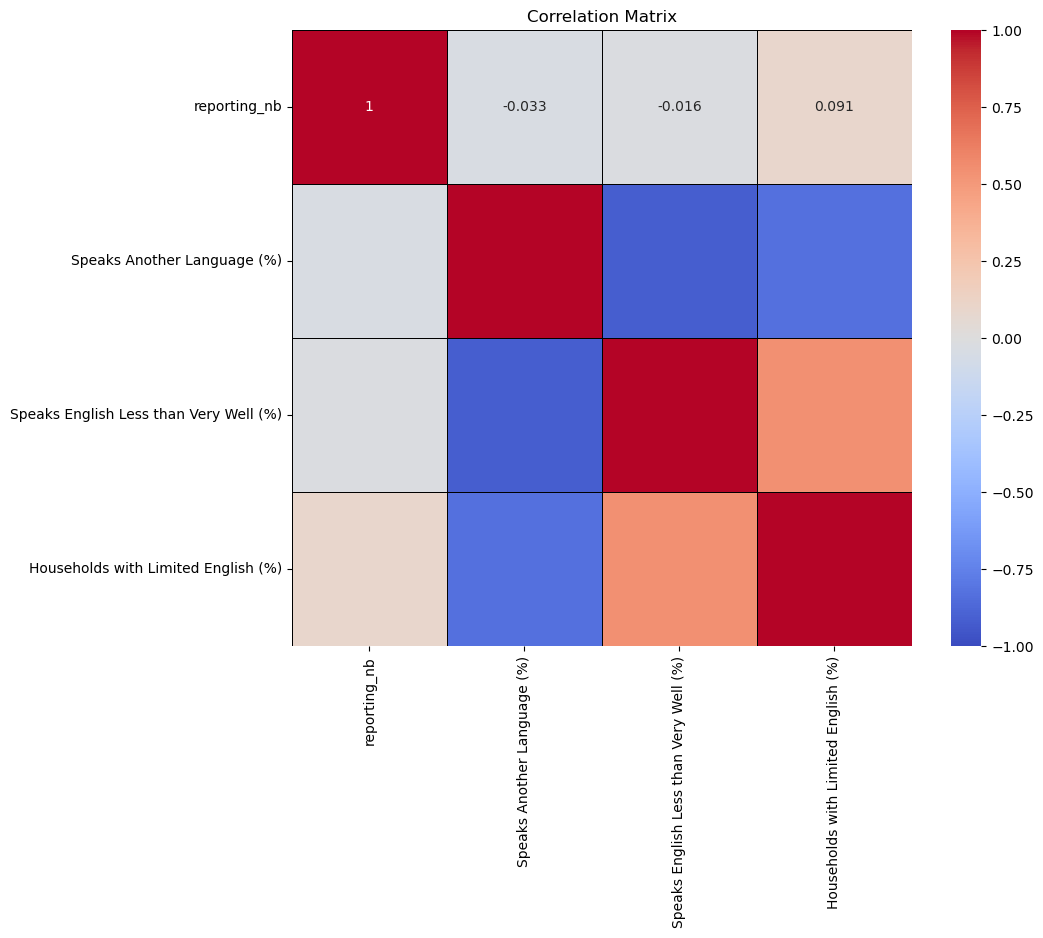

In [429]:
# Create a correlation matrix
correlation_matrix = language_2020[['reporting_nb', 'Speaks Another Language (%)', 'Speaks English Less than Very Well (%)', 'Households with Limited English (%)']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
crime_df.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude,year,month
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,drug/narcotic violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,theft of motor vehicle parts or accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,destruction/damage/vandalism of property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020,2
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020,2


In [ ]:
# Gruppieren nach 'mcpp' und 'year' und eindeutige Straftaten zählen
unique_offense_counts = crime_df.groupby(['mcpp', 'year'])['offense'].nunique().reset_index(name='unique_offense_count')

# Sortieren nach 'mcpp' und 'year'
sorted_unique_offense_counts = unique_offense_counts.sort_values(by=['mcpp', 'year'])

# Ergebnis anzeigen
print(sorted_unique_offense_counts)

                 mcpp  year  unique_offense_count
0              <Null>  2022                     1
1     ALASKA JUNCTION  2000                     2
2     ALASKA JUNCTION  2001                     1
3     ALASKA JUNCTION  2002                     1
4     ALASKA JUNCTION  2003                     3
...               ...   ...                   ...
1439      WALLINGFORD  2020                    31
1440      WALLINGFORD  2021                    33
1441      WALLINGFORD  2022                    32
1442      WALLINGFORD  2023                    31
1443      WALLINGFORD  2024                    30

[1444 rows x 3 columns]


In [431]:
unemployment_rate


,DATE,SEAT653URN
0,1990-01-01,4.8
1,1990-02-01,4.6
2,1990-03-01,4.4
3,1990-04-01,3.7
4,1990-05-01,3.9
...,...,...
408,2024-01-01,4.7
409,2024-02-01,4.7
410,2024-03-01,4.4
411,2024-04-01,4.1


In [434]:
unemployment_rate['DATE'] = pd.to_datetime(unemployment_rate['DATE'])

In [437]:
unemployment_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        413 non-null    datetime64[ns]
 1   SEAT653URN  413 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


In [438]:
unemployment_rate['year'] = unemployment_rate.DATE.dt.year

In [443]:
unemployment_rate.rename(columns={'SEAT653URN' : 'unemployment_rate'}, inplace = True)

In [445]:
unemployment_rate

,DATE,unemployment_rate,year
0,1990-01-01,4.8,1990
1,1990-02-01,4.6,1990
2,1990-03-01,4.4,1990
3,1990-04-01,3.7,1990
4,1990-05-01,3.9,1990
...,...,...,...
408,2024-01-01,4.7,2024
409,2024-02-01,4.7,2024
410,2024-03-01,4.4,2024
411,2024-04-01,4.1,2024


In [444]:
unemployment_yearly = unemployment_rate.groupby(['year'])['unemployment_rate'].mean().reset_index()

In [446]:
unemployment_yearly

,year,unemployment_rate
0,1990,3.966667
1,1991,4.791667
2,1992,5.858333
3,1993,6.016667
4,1994,5.100000
5,1995,5.025000
6,1996,4.625000
7,1997,3.933333
8,1998,3.683333
9,1999,3.708333


In [448]:
summary_df.rename(columns={'index':'year'}, inplace = True)

In [457]:
#changing year (obj) to (int) so we can merge 
summary_df['year'] = summary_df['year'].astype('int')

In [452]:
unemployment_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               35 non-null     int32  
 1   unemployment_rate  35 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 548.0 bytes


In [460]:
unemployment_mcpp = unemployment_yearly.merge(summary_df, on= 'year')

In [461]:
unemployment_mcpp

,year,unemployment_rate,level_0,DOWNTOWN COMMERCIAL,CAPITOL HILL,NORTHGATE,QUEEN ANNE,SLU/CASCADE,UNIVERSITY,ROOSEVELT/RAVENNA,...,ALKI,SOUTH DELRIDGE,UNKNOWN,GENESEE,MADISON PARK,EASTLAKE - EAST,PIGEON POINT,COMMERCIAL DUWAMISH,COMMERCIAL HARBOR ISLAND,<Null>
0,2014,5.050000,0,6205,4640,4068,3291,2848,2648,2430,...,313,307,301,260,250,118,62,33,15,NaN
1,2015,4.641667,1,6485,4635,4392,3391,2853,2922,2245,...,309,279,341,229,251,124,51,24,22,NaN
2,2016,4.316667,2,6294,4532,4392,3331,3109,2881,2539,...,363,344,404,177,308,114,64,40,22,NaN
3,2017,3.983333,3,7041,4786,4745,3540,3130,2974,2641,...,399,333,656,143,204,121,68,61,38,NaN
4,2018,3.716667,4,6984,4712,4473,3722,3234,2914,2633,...,309,357,689,168,203,87,84,71,36,NaN
5,2019,3.225000,5,6158,4308,3962,3787,3006,3004,2651,...,296,308,484,138,192,103,84,37,36,NaN
6,2020,8.425000,6,4082,4471,3977,4453,3295,3135,3171,...,407,255,1122,231,331,102,85,41,33,NaN
7,2021,4.733333,7,4181,4328,4228,3765,3343,2979,3002,...,362,286,856,249,225,126,89,78,27,NaN
8,2022,3.458333,8,4632,4644,4086,4441,3403,3152,2993,...,410,369,1295,283,235,138,136,79,42,1.0


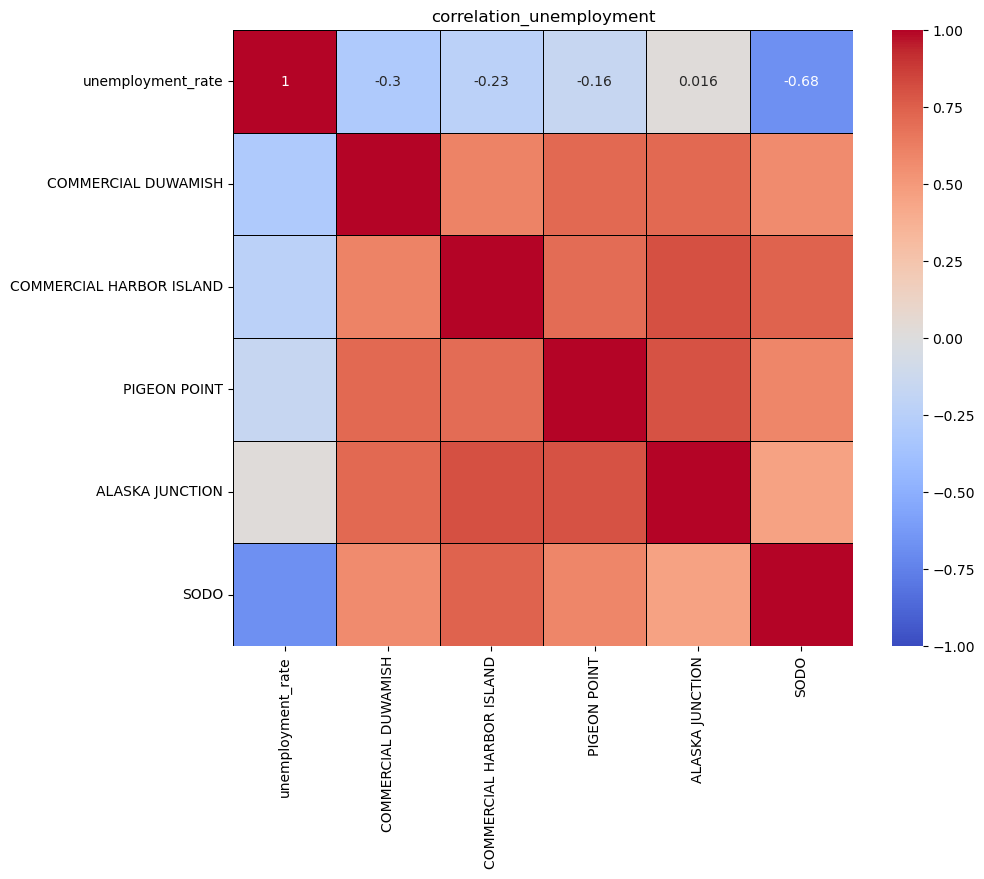

In [464]:
# Create a correlation matrix TOP 5 crime: growth rate neighborhood; value (crime count)
# unemployment rate (average 12month)
correlation_unemployment = unemployment_mcpp[['unemployment_rate', 'COMMERCIAL DUWAMISH', 'COMMERCIAL HARBOR ISLAND', 'PIGEON POINT', 'ALASKA JUNCTION', 'SODO']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_unemployment, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('correlation_unemployment')
plt.show()

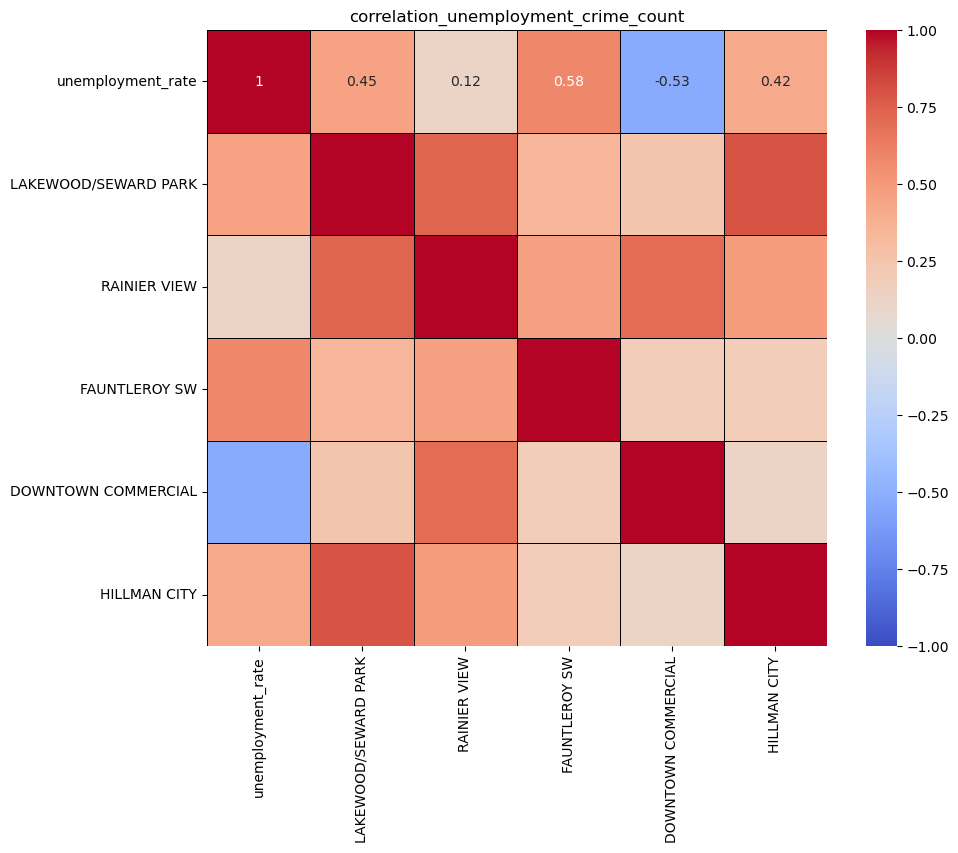

In [463]:
# Create a correlation matrix
# Create a correlation matrix Less 5 crime: growth rate neighborhood; value (crime count)
# unemployment rate (average 12month)
correlation_unemployment_crime_count = unemployment_mcpp[['unemployment_rate','LAKEWOOD/SEWARD PARK','RAINIER VIEW','FAUNTLEROY SW','DOWNTOWN COMMERCIAL','HILLMAN CITY']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_unemployment_crime_count, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('correlation_unemployment_crime_count')
plt.show()

In [ ]:
'''
Crime: Growths rate

TOP 5
1.'COMMERCIAL DUWAMISH'
2.'COMMERCIAL HARBOR ISLAND'
3.'PIGEON POINT'
4. 'ALASKA JUNCTION'
5.'SODO'

LAST 5
1.'LAKEWOOD/SEWARD PARK'
2. 'RAINIER VIEW'
3.'FAUNTLEROY SW'
4. 'DOWNTOWN COMMERCIAL'
5.'HILLMAN CITY'

        'ALKI', 'BALLARD NORTH',
       'BALLARD SOUTH', 'BELLTOWN', 'BITTERLAKE', 'BRIGHTON/DUNLAP',
       'CAPITOL HILL', 'CENTRAL AREA/SQUIRE PARK',
       'CHINATOWN/INTERNATIONAL DISTRICT', 'CLAREMONT/RAINIER VISTA',
       'COLUMBIA CITY', , ,
       , 'EASTLAKE - EAST', 'EASTLAKE - WEST',
       , 'FIRST HILL', 'FREMONT', 'GENESEE', 'GEORGETOWN',
       'GREENWOOD', 'HIGH POINT', 'HIGHLAND PARK', ,
       'JUDKINS PARK/NORTH BEACON HILL', 'LAKECITY',
       , 'MADISON PARK', 'MADRONA/LESCHI',
       'MAGNOLIA', 'MID BEACON HILL', 'MILLER PARK',
       'MONTLAKE/PORTAGE BAY', 'MORGAN', 'MOUNT BAKER', 'NEW HOLLY',
       'NORTH ADMIRAL', 'NORTH BEACON HILL', 'NORTH DELRIDGE',
       'NORTHGATE', 'PHINNEY RIDGE', , 'PIONEER SQUARE',
       'QUEEN ANNE', 'RAINIER BEACH', , 'ROOSEVELT/RAVENNA',
       'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'SANDPOINT', 'SLU/CASCADE',
       , 'SOUTH BEACON HILL', 'SOUTH DELRIDGE', 'SOUTH PARK',
       'UNIVERSITY', 'UNKNOWN', 'WALLINGFORD']

'''

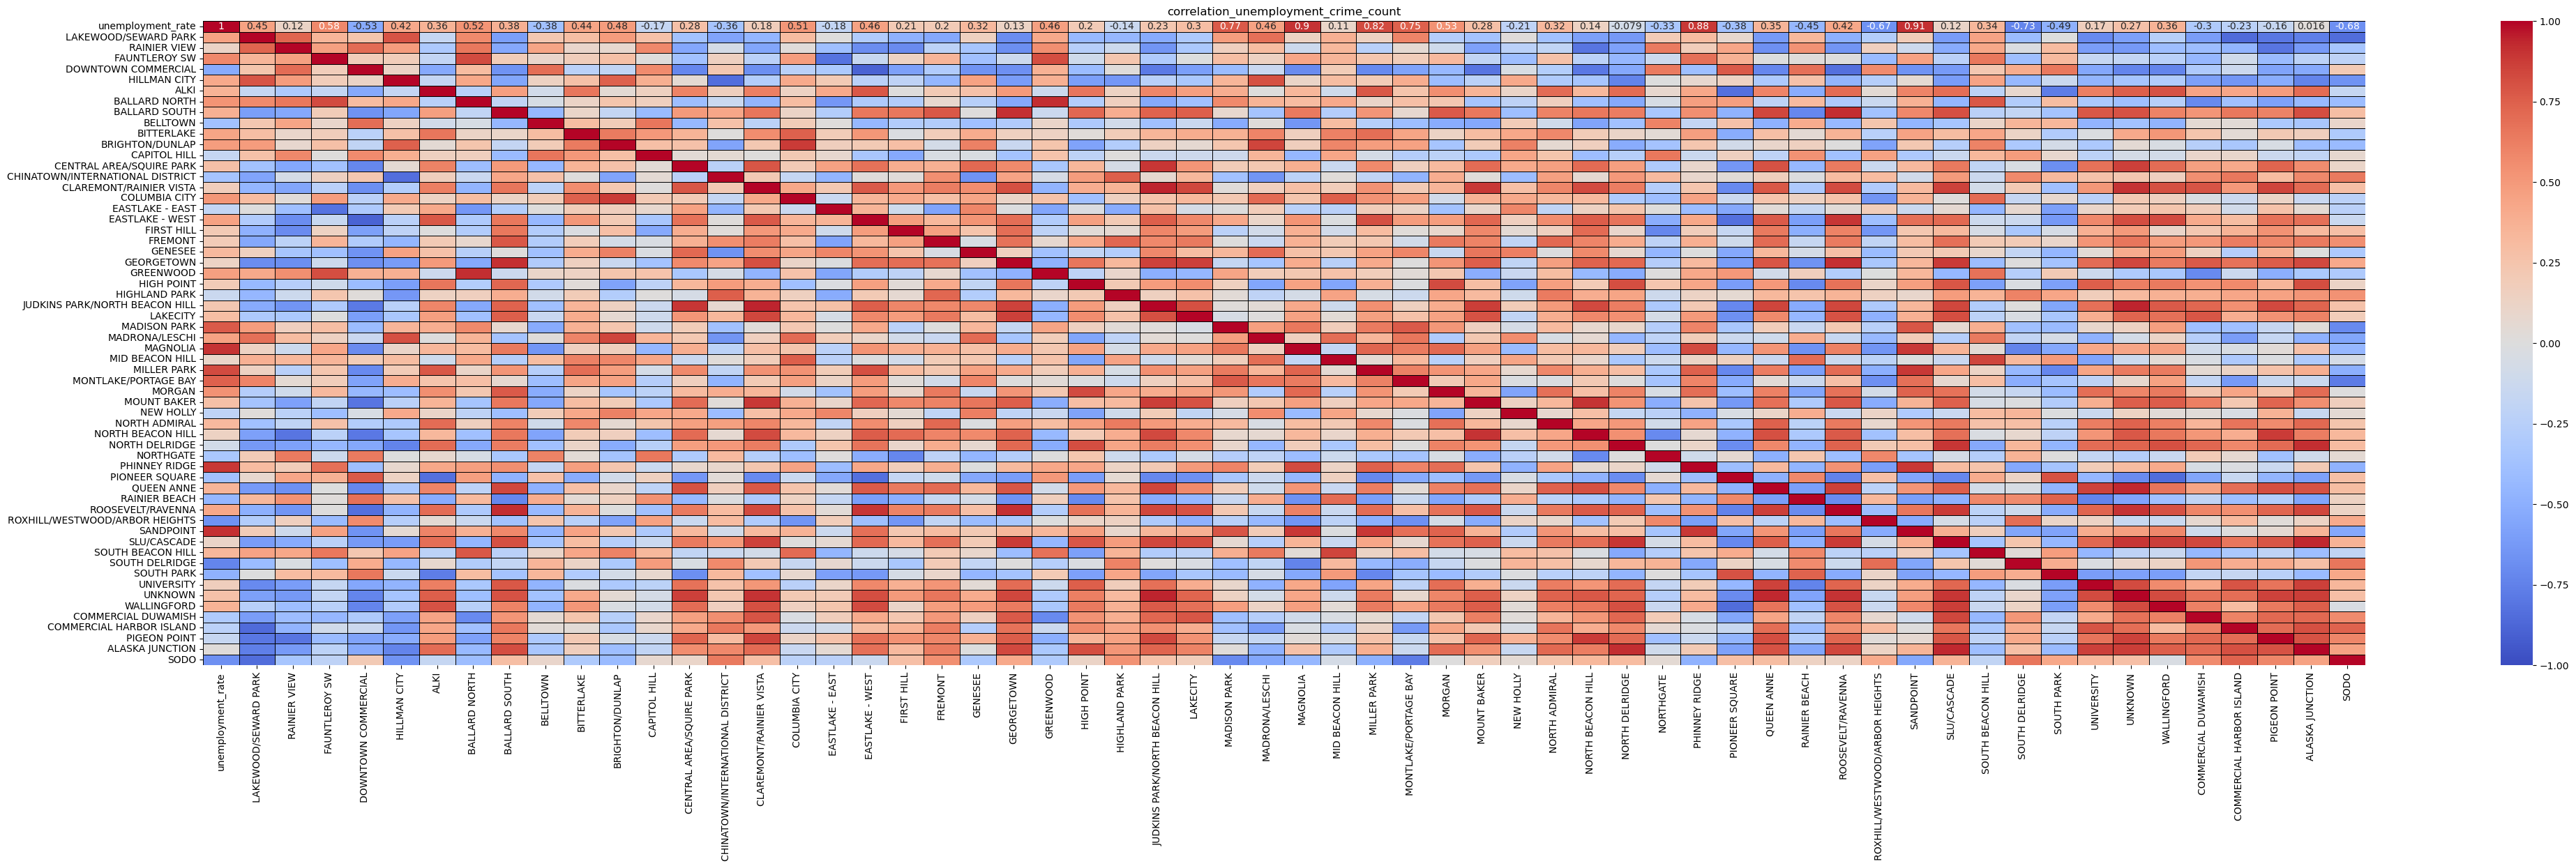

In [472]:
correlation_unemployment_crime_count = unemployment_mcpp[['unemployment_rate','LAKEWOOD/SEWARD PARK','RAINIER VIEW','FAUNTLEROY SW','DOWNTOWN COMMERCIAL','HILLMAN CITY', 'ALKI', 'BALLARD NORTH',
       'BALLARD SOUTH', 'BELLTOWN', 'BITTERLAKE', 'BRIGHTON/DUNLAP','CAPITOL HILL', 'CENTRAL AREA/SQUIRE PARK','CHINATOWN/INTERNATIONAL DISTRICT', 'CLAREMONT/RAINIER VISTA',
       'COLUMBIA CITY', 'EASTLAKE - EAST', 'EASTLAKE - WEST', 'FIRST HILL', 'FREMONT', 'GENESEE', 'GEORGETOWN','GREENWOOD', 'HIGH POINT', 'HIGHLAND PARK',
       'JUDKINS PARK/NORTH BEACON HILL', 'LAKECITY','MADISON PARK', 'MADRONA/LESCHI','MAGNOLIA', 'MID BEACON HILL', 'MILLER PARK','MONTLAKE/PORTAGE BAY', 'MORGAN', 'MOUNT BAKER', 'NEW HOLLY',
       'NORTH ADMIRAL', 'NORTH BEACON HILL', 'NORTH DELRIDGE','NORTHGATE', 'PHINNEY RIDGE','PIONEER SQUARE','QUEEN ANNE', 'RAINIER BEACH', 'ROOSEVELT/RAVENNA','ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'SANDPOINT', 'SLU/CASCADE','SOUTH BEACON HILL', 'SOUTH DELRIDGE', 'SOUTH PARK',
       'UNIVERSITY', 'UNKNOWN', 'WALLINGFORD','COMMERCIAL DUWAMISH', 'COMMERCIAL HARBOR ISLAND', 'PIGEON POINT', 'ALASKA JUNCTION','SODO']].corr()

# Plot the correlation matrix
plt.figure(figsize=(50, 12))
sns.heatmap(correlation_unemployment_crime_count, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('correlation_unemployment_crime_count')
plt.show()